In [22]:
import pandas as pd
import numpy as np

In [23]:
!cd

C:\Users\rock2\RakeshM_Work\PROJECTS\Streamlit\Medical Coding\UI\MedicalC\Data\TRAINING


In [24]:
!dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is 6456-C3AA

 Directory of C:\Users\rock2\RakeshM_Work\PROJECTS\Streamlit\Medical Coding\UI\MedicalC\Data\TRAINING

05/16/2024  06:28 PM    <DIR>          .
05/16/2024  06:24 PM    <DIR>          ..
05/16/2024  06:22 PM    <DIR>          .ipynb_checkpoints
05/16/2024  06:28 PM             9,325 EDA and Viz.ipynb
05/04/2024  03:21 PM        56,921,996 TRAINING_CPT.csv
05/04/2024  03:20 PM        21,290,219 Training_V2.csv
               3 File(s)     78,221,540 bytes
               3 Dir(s)  348,610,215,936 bytes free


In [25]:
icd_df = pd.read_csv("Training_V2.csv")

In [26]:
cpt_df = pd.read_csv("TRAINING_CPT.csv")

In [27]:
icd_df.head()

Unnamed: 0                               OCR_DIAGNOSIS_DESC DIAGNOSIS_CODE
0           0  CHOLERA DUE TO VIBRIO CHOLERAE 01, BIOVAR ELTOR          A00.1
1           1                             CHOLERA, UNSPECIFIED          A00.9
2           2                       TYPHOID FEVER, UNSPECIFIED         A01.00
3           3                               TYPHOID MENINGITIS         A01.01
4           4             TYPHOID FEVER WITH HEART INVOLVEMENT         A01.02

In [28]:
print(icd_df.describe())

          Unnamed: 0
count  351952.000000
mean   175975.500000
std    101599.935308
min         0.000000
25%     87987.750000
50%    175975.500000
75%    263963.250000
max    351951.000000


In [29]:
print(icd_df.isnull().sum())


Unnamed: 0            0
OCR_DIAGNOSIS_DESC    0
DIAGNOSIS_CODE        0
dtype: int64


In [30]:
!pip install seaborn

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
icd_df1 = icd_df.head(1000)

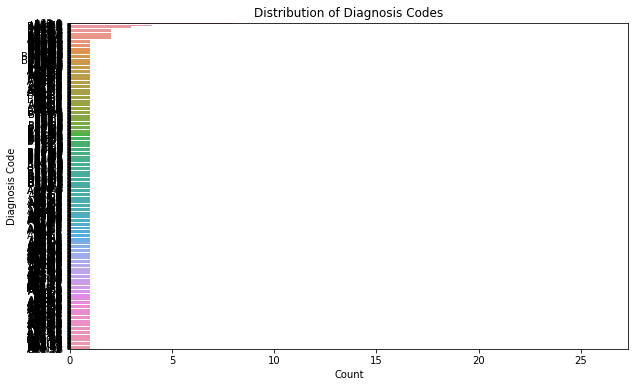

In [34]:
# Visualization - Bar plot of Diagnosis Codes
plt.figure(figsize=(10, 6))
sns.countplot(y='DIAGNOSIS_CODE', data=icd_df1, order=icd_df1['DIAGNOSIS_CODE'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Diagnosis Code')
plt.title('Distribution of Diagnosis Codes')
plt.show()

In [36]:
!pip install wordcloud

In [41]:
cpt_df.head()

PROCEDURE_DESC CPT_CODE  AGE_INDICATOR  GENDER_INDICATOR  MIN_AGE  MAX_AGE
0          -6065    52356              0                 0      NaN      NaN
1        1:00 PM    45380              0                 0      NaN      NaN
2        1:24 PM    45378              0                 0      NaN      NaN
3        3:06 PM    43274              0                 0      NaN      NaN
4        3:09 PM    45385              0                 0      NaN      NaN

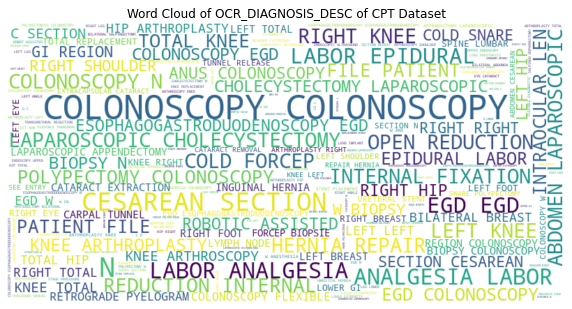

In [42]:
# Visualization - Word cloud of Diagnosis Descriptions
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cpt_df['PROCEDURE_DESC']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of OCR_DIAGNOSIS_DESC of CPT Dataset')
plt.show()

In [47]:
icd_df.columns

Index(['Unnamed: 0', 'OCR_DIAGNOSIS_DESC', 'DIAGNOSIS_CODE',
       'Diagnosis_Desc_Length'],
      dtype='object')

In [48]:
cpt_df.columns

Index(['PROCEDURE_DESC', 'CPT_CODE', 'AGE_INDICATOR', 'GENDER_INDICATOR',
       'MIN_AGE', 'MAX_AGE'],
      dtype='object')

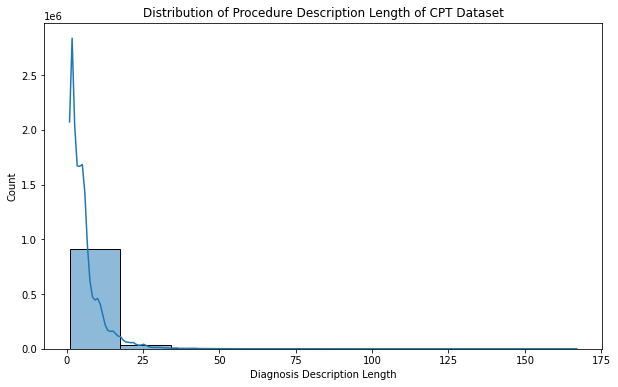

In [50]:
# Visualization - Distribution of Diagnosis Description Length
cpt_df['Diagnosis_Desc_Length'] = cpt_df['PROCEDURE_DESC'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(cpt_df['Diagnosis_Desc_Length'], bins=10, kde=True)
plt.xlabel('Diagnosis Description Length')
plt.ylabel('Count')
plt.title('Distribution of Procedure Description Length of CPT Dataset')
plt.show()